In [1]:
using CairoMakie, LaTeXStrings
using Makie.GeometryBasics
using CSV, DataFrames

In [2]:
function get_points(low, high, depth)
    pts = Point2f[]
    for i in 1:length(depth)
        pt = (low[i], depth[i])
        push!(pts,pt)
    end
    for i in length(depth):-1:1
        pt = (high[i], depth[i])
        push!(pts,pt)
    end
    return pts
end

get_points (generic function with 1 method)

In [3]:
include("pro_mixo_calc.jl")
rawinput = CSV.read("../Input/pro_mixo_input.csv", DataFrame)
input_Med = filter(:Site => x -> x == "Med", rawinput)
input_EqPac = filter(:Site => x -> x == "EqPac", rawinput)
input_HOT55 = filter(:Site => x -> x == "HOT55", rawinput)

hourlyPAR = CSV.read("../Input/hourly_PAR.csv", DataFrame)
hPARfrac_EqPac = hourlyPAR.Eq_Pac
hPARfrac_HOT55 = hourlyPAR.HOT_Jul

summ_Eq, out_Eq = output_summary(input_EqPac, hPARfrac_EqPac)
summ_HOT, out_HOT = output_summary(input_HOT55, hPARfrac_HOT55)
nothing

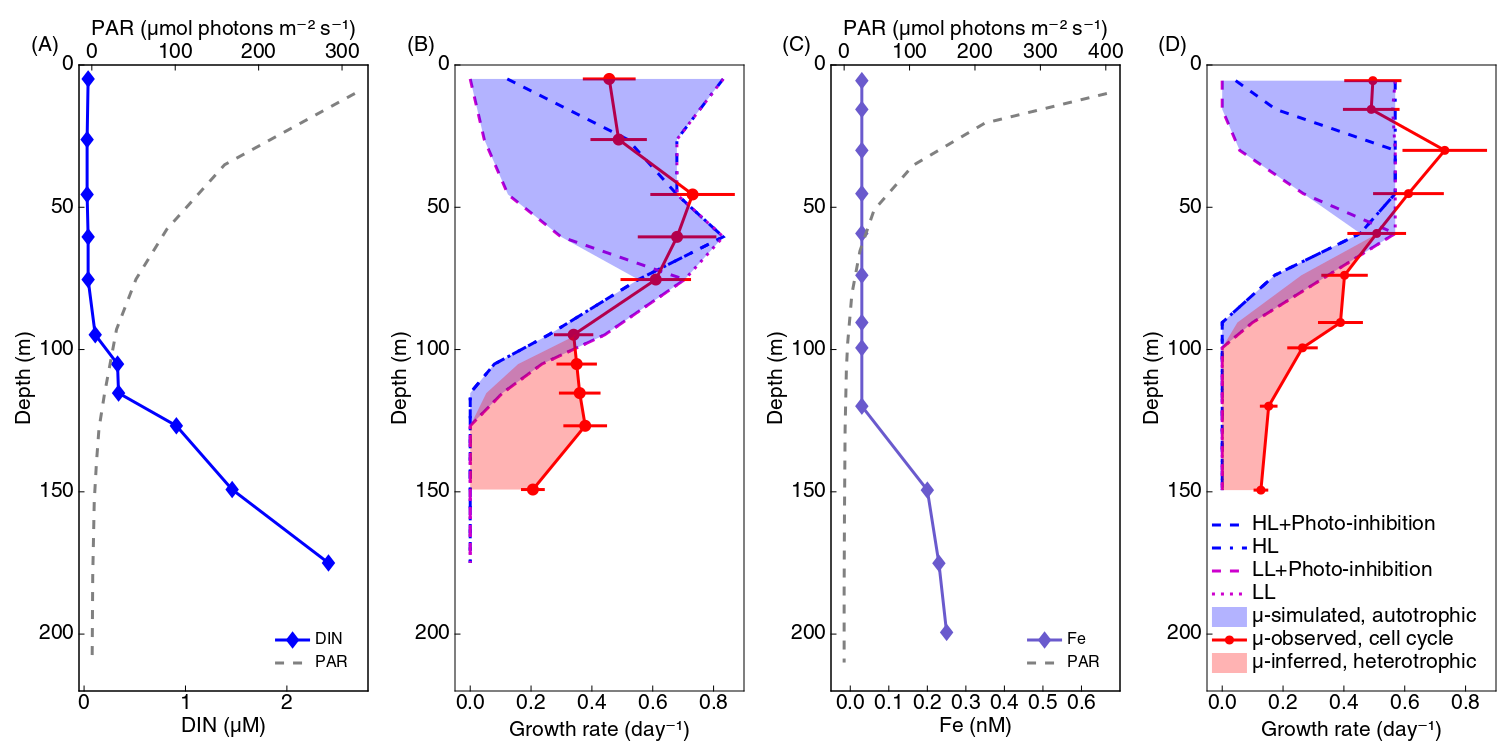

In [4]:
size_inches = (7, 3.5)
size_pt = 72 .* size_inches .* 3
lbsz = 7*3
ttsz = 7*3
fig = Figure(resolution = size_pt, font = "Helvetica")

ax1 = Axis(fig[1,1], xlabel = "DIN (μM)", ylabel = "Depth (m)", yreversed = true, xlabelsize = lbsz, ylabelsize = lbsz)
tw1 = Axis(fig[1,1], xaxisposition = :top, xlabel = "PAR (μmol photons m⁻² s⁻¹)", yreversed = true, xlabelsize = lbsz, ylabelsize = lbsz)
ax2 = Axis(fig[1,2], xlabel = "Growth rate (day⁻¹)", ylabel = "Depth (m)", yreversed = true, xlabelsize = lbsz, ylabelsize = lbsz)
ax3 = Axis(fig[1,3], xlabel = "Fe (nM)", ylabel = "Depth (m)", yreversed = true, xlabelsize = lbsz, ylabelsize = lbsz)
tw2 = Axis(fig[1,3], xaxisposition = :top, xlabel = "PAR (μmol photons m⁻² s⁻¹)", yreversed = true, xlabelsize = lbsz, ylabelsize = lbsz)
ax4 = Axis(fig[1,4], xlabel = "Growth rate (day⁻¹)", ylabel = "Depth (m)", yreversed = true, xlabelsize = lbsz, ylabelsize = lbsz)

axs = [ax1, ax2, ax3, ax4]
tws = [tw1, tw2]

for ax in axs
    hidedecorations!(ax, ticks = false, label = false, ticklabels = false, minorticks = false)
end
hidexdecorations!(tw1, ticks = false, label = false, ticklabels = false)
hideydecorations!(tw1)
hidexdecorations!(tw2, ticks = false, label = false, ticklabels = false)
hideydecorations!(tw2)

# ax1 & ax3
ln1 = lines!(ax1, input_HOT55.DIN, input_HOT55.Depth, color = :blue, linewidth = 3)
sc1 = scatter!(ax1, input_HOT55.DIN, input_HOT55.Depth, color = :blue, marker = '♦', markersize = 24)
ln2 = lines!(tw1, input_HOT55.PARav, input_HOT55.Depth, color = :grey, linestyle = :dash, linewidth = 3)

axislegend(ax1, [[ln1,sc1], ln2], ["DIN", "PAR"], position = :rb, framevisible = false, patchsize = (35, 20))

ln3 = lines!(ax3, input_EqPac.Fe_d, input_EqPac.Depth, color = :slateblue, linewidth = 3)
sc2 = scatter!(ax3, input_EqPac.Fe_d, input_EqPac.Depth, color = :slateblue, marker = '♦', markersize = 24)
ln4 = lines!(tw2, input_EqPac.PARav, input_EqPac.Depth, color = :grey, linestyle = :dash, linewidth = 3)

axislegend(ax3, [[ln3,sc2], ln4], ["Fe", "PAR"], position = :rb, framevisible = false, patchsize = (35, 20))

limits!(ax1, -0.05, 2.8, 220, 0)
limits!(ax3, -0.05, 0.7, 220, 0)

# ax2 & ax4
ln5 = lines!(ax2, out_HOT[:,1,2], input_HOT55.Depth, color = :blue, linewidth = 3, linestyle = :dash)
ln6 = lines!(ax2, out_HOT[:,2,2], input_HOT55.Depth, color = :blue, linewidth = 3, linestyle = :dashdot)
ln7 = lines!(ax2, out_HOT[:,3,2], input_HOT55.Depth, color = :magenta3, linewidth = 3, linestyle = :dash)
ln8 = lines!(ax2, out_HOT[:,4,2], input_HOT55.Depth, color = :magenta3, linewidth = 3, linestyle = :dot)
ln9 = lines!(ax2, input_HOT55.Pro_mu, input_HOT55.Depth, color = :red, linewidth = 3)
errorbars!(ax2, input_HOT55.Pro_mu, input_HOT55.Depth, input_HOT55.Pro_mu .* 0.19, input_HOT55.Pro_mu .* 0.19, direction = :x, color = :red, linewidth = 3)
sc3 = scatter!(ax2, input_HOT55.Pro_mu, input_HOT55.Depth, color = :red, markersize = 12)


ln10= lines!(ax4, out_Eq[:,1,2], input_EqPac.Depth, color = :blue, linewidth = 3, linestyle = :dash)
ln11= lines!(ax4, out_Eq[:,2,2], input_EqPac.Depth, color = :blue, linewidth = 3, linestyle = :dashdot)
ln12= lines!(ax4, out_Eq[:,3,2], input_EqPac.Depth, color = :magenta3, linewidth = 3, linestyle = :dash)
ln13= lines!(ax4, out_Eq[:,4,2], input_EqPac.Depth, color = :magenta3, linewidth = 3, linestyle = :dot)
ln14= lines!(ax4, input_EqPac.Pro_mu, input_EqPac.Depth, color = :red, linewidth = 3)
errorbars!(ax4, input_EqPac.Pro_mu, input_EqPac.Depth, input_EqPac.Pro_mu .* 0.19, input_EqPac.Pro_mu .* 0.19, direction = :x, color = :red, linewidth = 3)
sc4 = scatter!(ax4, input_EqPac.Pro_mu, input_EqPac.Depth, color = :red)


limits!(ax2, -0.05, 0.9, 220, 0)
limits!(ax4, -0.05, 0.9, 220, 0)

poly1 = poly!(ax2, get_points(summ_HOT[:,2,2], summ_HOT[:,3,2], input_HOT55.Depth), color = (:blue, 0.3))
poly2 = poly!(ax2, get_points(summ_HOT[6:10,1,2], input_HOT55.Pro_mu[6:10], input_HOT55.Depth[6:10]), color = (:red, 0.3))

poly3 = poly!(ax4, get_points(summ_Eq[:,2,2], summ_Eq[:,3,2], input_EqPac.Depth), color = (:blue, 0.3))
poly4 = poly!(ax4, get_points(summ_Eq[5:10,1,2], input_EqPac.Pro_mu[5:10], input_EqPac.Depth[5:10]), color = (:red, 0.3))

axislegend(ax4, [ln10, ln11, ln12, ln13, poly3, [ln14,sc4], poly4], 
    ["HL+Photo-inhibition","HL","LL+Photo-inhibition", "LL","μ-simulated, autotrophic", "μ-observed, cell cycle", "μ-inferred, heterotrophic"], 
    position = :rb, labelsize = lbsz, framevisible = false, patchsize = (35, 20))

#axislegend(ax4, [poly3, [ln14,sc4], poly4], ["μ-simulated, autotrophic", "μ-observed, cell cycle", "μ-inferred, heterotrophic"], position = :rb, labelsize = lbsz, framevisible = false)


for ax in axs
    ax.xticklabelsize = lbsz
    ax.yticklabelsize = lbsz
    ax.xtickalign = 1
    ax.ytickalign = 1
end
for tw in tws
    tw.xticklabelsize = lbsz
    tw.yticklabelsize = lbsz
    tw.xtickalign = 1
    tw.ytickalign = 1
end

labels = ["(A)", "(B)", "(C)", "(D)"]


for i in 1:4
    Label(fig[1, i][1,1,TopLeft()], labels[i], textsize = ttsz, padding = (0, 20, 10, 0), halign = :right)
end

fig

In [5]:
#save("Figure2_new.pdf", fig, pt_per_unit = 1)